In [1]:
library('magrittr')
library('tibble')
library('dplyr')
library('tidyr')
library('ggplot2')
library('RColorBrewer')
library('readr')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
bead_flow <- 
    read_tsv(
        'data.tsv',
         col_types=cols(
             `Sample:`=col_character(),
             `Day`=col_factor(levels=c('Day 1', 'Day 2', 'Day 3', 'Day 4')),
             `Bead_to_cell`=col_factor(levels=c('3', '1', '0.3', '0.1', '0.03', '0')),
             `Donor`=col_factor(levels=c('Donor 52', 'Donor 53', 'Donor 54', 'Donor 55')),
             .default=col_double()
         )
    ) %>%
    mutate(`Bead:Cell`=`Bead_to_cell`)

bead_flow %>% head

Sample:,Day,Bead_to_cell,Donor,Count,Bead+Cells | Freq. of Parent,Beads | Freq. of Parent,Lymphocytes | Freq. of Parent,Lymphocytes/CCR7+ CD45RO+ | Freq. of Parent,Lymphocytes/CCR7+ CD45RO- | Freq. of Parent,Lymphocytes/CCR7- CD45RO+ | Freq. of Parent,Lymphocytes/CCR7- CD45RO- | Freq. of Parent,Lymphocytes/CD69+ | Freq. of Parent,Lymphocytes/CD69- | Freq. of Parent,Bead:Cell
Tube_001.fcs,Day 1,3,Donor 52,795000,3.31,80.20,10.3,21.3,48.4,18.7,11.70,91.50,8.45,3
Tube_002.fcs,Day 1,1,Donor 52,600000,7.09,50.70,25.0,25.3,42.8,25.7,6.24,90.60,9.40,1
Tube_003.fcs,Day 1,0.3,Donor 52,402000,9.99,24.10,39.6,23.1,42.7,26.6,7.52,86.60,13.40,0.3
Tube_004.fcs,Day 1,0.1,Donor 52,327325,10.20,6.41,51.2,21.7,44.4,26.3,7.60,72.00,28.00,0.1
Tube_005.fcs,Day 1,0.03,Donor 52,305446,6.70,1.11,58.5,19.8,46.0,26.2,8.01,50.30,49.70,0.03
Tube_006.fcs,Day 1,0,Donor 52,203735,1.13,0.20,68.8,19.3,43.1,29.7,7.97,7.34,92.70,0


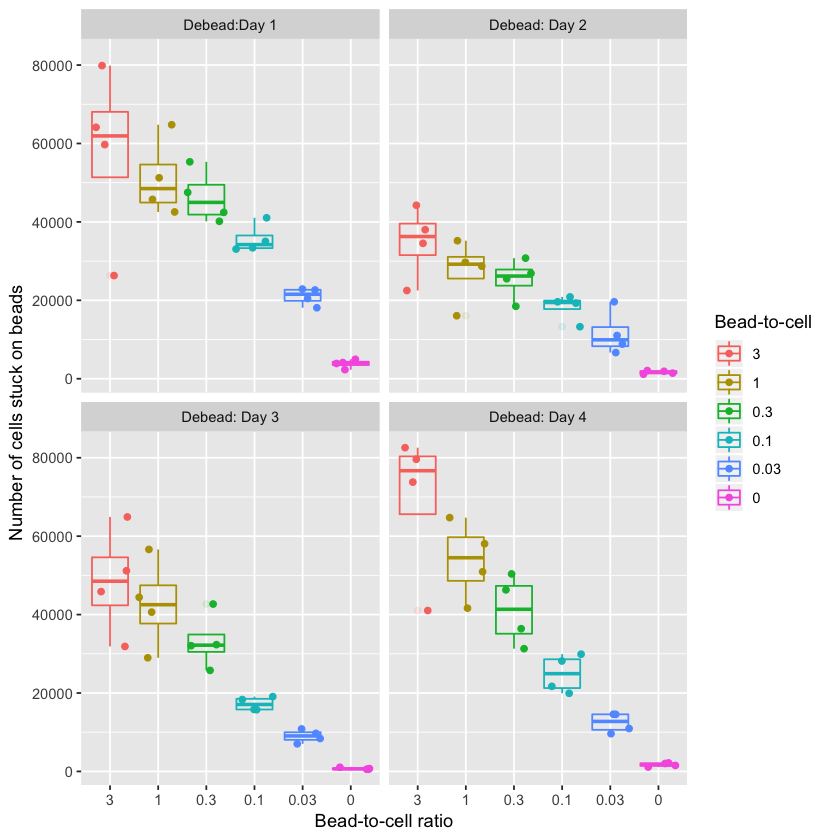

In [7]:
day_labeler <-
    c(
        `Day 1`="Debead:Day 1",
        `Day 2`="Debead: Day 2",
        `Day 3`="Debead: Day 3",
        `Day 4`="Debead: Day 4"
    )

bead_flow %>%
    mutate(`Cells stuck on beads`=`Count` * (`Bead+Cells | Freq. of Parent`/100.0)) %>%
    ggplot(aes(x=`Bead:Cell`, y=`Cells stuck on beads`, color=`Bead:Cell`)) +
        geom_boxplot(alpha=.1) +
        geom_jitter() +
        ylab('Number of cells stuck on beads') +
        facet_wrap(~`Day`, ncol=2, labeller=as_labeller(day_labeler)) +
        labs(
            x='Bead-to-cell ratio',
            color='Bead-to-cell'
        )
